In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
import ast
import csv

In [2]:
path = r"F:\Dataset_det\train_images\video_0"
images = os.listdir(path)
labels = pd.read_csv(r"F:\Dataset_det\train.csv")

In [3]:
labels = labels[labels['video_id'] == 0]#for selecting images with video_id 0

In [4]:
labels

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]
...,...,...,...,...,...,...
6703,0,996,12343,918,0-12343,[]
6704,0,996,12344,919,0-12344,[]
6705,0,996,12345,920,0-12345,[]
6706,0,996,12346,921,0-12346,[]


In [ ]:
labels[16:]

In [5]:
frame_sequence = labels['video_frame'].to_list()
position = labels['annotations'].to_list()

In [ ]:
position[16]

In [ ]:
ast.literal_eval(position[16])

# Converting annotations to yolov5 format

For getting coordinates in yolov5 format ie xcen,ycen,w,h we need to perform follwing 2 steps 

coordinates provided in dataset is in format of x,y,w,h

first we convert it into xmin,xmax,ymin,ymax  using 

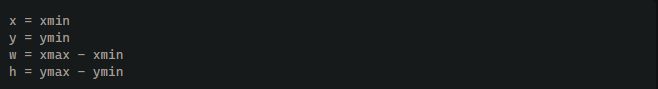

Than using following formula we get coordinates in yolov5 format

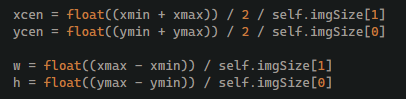


In [6]:
def BndBox2YoloLine(box, imgSize):
#     print(box, imgSize)
    xmin = box['xmin']
    xmax = box['xmax']
    ymin = box['ymin']
    ymax = box['ymax']

    xcen = float((xmin + xmax)) / 2 / imgSize[1]
    ycen = float((ymin + ymax)) / 2 / imgSize[0]

    w = float((xmax - xmin)) / imgSize[1]
    h = float((ymax - ymin)) / imgSize[0]

    return xcen, ycen, w, h

In [8]:
train_save_path = r'F:\Dataset_det\test'
images = os.listdir(path)

In [9]:
count = 0
new_count = 0
while True:
    
    frame = str(frame_sequence[count]) + '.jpg' # getting images for frame 0

    img = cv2.imread(os.path.join(path,frame))
    save_base_img = cv2.imread(os.path.join(path,frame))
    # getting annotations and converting into xmin,xmax,ymin,ymax
    if frame in images:
#         print(img.shape)
        pos_list = ast.literal_eval(position[count])# using literal_eval to get the annotations 
        label = False
        if len(pos_list) > 0:
            label = True
        for pos_dict in pos_list:
            x = pos_dict['x']
            y = pos_dict['y']
            w = pos_dict['width']
            h = pos_dict['height']
            img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        img = cv2.putText(img, frame, (20, 185), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)
        img = cv2.putText(img, str(label), (20, 135), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)
        cv2.imshow('i',img)
        
        # applying formula to get yolov5 format
        if label:
            box = dict()
            box['xmin'] = x
            box['xmax'] = x+w
            box['ymin'] = y
            box['ymax'] = y+h
            imgSize = (img.shape[0], img.shape[1])
            new_x, new_y, new_w, new_h = BndBox2YoloLine(box, imgSize)
            
            #script to create a folder with image and text file 
            image_path = os.path.join(train_save_path,frame)
            text_file_name = os.path.join(train_save_path, str(frame.split('.')[0]) + ".txt")
            print(text_file_name)
            text_str = "0 " + str(new_x) + " " + str(new_y) + " " + str(new_w) + " " + str(new_h) + ""
            print("New cordinate:", text_str, image_path)
            #save image with frame 
            cv2.imwrite(image_path, save_base_img)
            #cv2.imwrite() 
            # Writer file with text_file_name
            file = open(text_file_name, 'w')
            file.write(text_str)
            file.close()
            #append 0 new_x new_y new_w new_h with concatination
            #writer save
            #writer close
            new_count += 1
        
    
#     time.sleep(2)
    if cv2.waitKey(5) == ord('q') or count >= len(images) or new_count == 1000:
        print(new_count)
        cv2.destroyAllWindows()
        break
        
    count += 1
        
cv2.waitKey(1)
cv2.destroyWindow('i')

F:\Dataset_det\test\16.txt
New cordinate: 0 0.45625 0.31805555555555554 0.0390625 0.044444444444444446 F:\Dataset_det\test\16.jpg
F:\Dataset_det\test\17.txt
New cordinate: 0 0.45546875 0.31805555555555554 0.0390625 0.044444444444444446 F:\Dataset_det\test\17.jpg
F:\Dataset_det\test\18.txt
New cordinate: 0 0.4546875 0.31805555555555554 0.0390625 0.044444444444444446 F:\Dataset_det\test\18.jpg
F:\Dataset_det\test\19.txt
New cordinate: 0 0.45390625 0.3194444444444444 0.0390625 0.044444444444444446 F:\Dataset_det\test\19.jpg
F:\Dataset_det\test\20.txt
New cordinate: 0 0.453125 0.3194444444444444 0.0390625 0.044444444444444446 F:\Dataset_det\test\20.jpg
F:\Dataset_det\test\21.txt
New cordinate: 0 0.44921875 0.3194444444444444 0.0390625 0.044444444444444446 F:\Dataset_det\test\21.jpg
F:\Dataset_det\test\22.txt
New cordinate: 0 0.4421875 0.3229166666666667 0.04375 0.06527777777777778 F:\Dataset_det\test\22.jpg
F:\Dataset_det\test\23.txt
New cordinate: 0 0.440625 0.32083333333333336 0.0453125 

F:\Dataset_det\test\81.txt
New cordinate: 0 0.33203125 0.4840277777777778 0.0546875 0.09027777777777778 F:\Dataset_det\test\81.jpg
F:\Dataset_det\test\82.txt
New cordinate: 0 0.328515625 0.5083333333333333 0.05546875 0.09166666666666666 F:\Dataset_det\test\82.jpg
F:\Dataset_det\test\83.txt
New cordinate: 0 0.325390625 0.5319444444444444 0.05703125 0.09444444444444444 F:\Dataset_det\test\83.jpg
F:\Dataset_det\test\84.txt
New cordinate: 0 0.322265625 0.55625 0.05859375 0.09583333333333334 F:\Dataset_det\test\84.jpg
F:\Dataset_det\test\85.txt
New cordinate: 0 0.318359375 0.5777777777777777 0.06015625 0.09722222222222222 F:\Dataset_det\test\85.jpg
F:\Dataset_det\test\86.txt
New cordinate: 0 0.314453125 0.6006944444444444 0.06171875 0.09861111111111111 F:\Dataset_det\test\86.jpg
F:\Dataset_det\test\87.txt
New cordinate: 0 0.310546875 0.6236111111111111 0.06328125 0.1 F:\Dataset_det\test\87.jpg
F:\Dataset_det\test\88.txt
New cordinate: 0 0.306640625 0.6465277777777778 0.06484375 0.1013888888

F:\Dataset_det\test\145.txt
New cordinate: 0 0.52578125 0.22430555555555556 0.0296875 0.05694444444444444 F:\Dataset_det\test\145.jpg
F:\Dataset_det\test\146.txt
New cordinate: 0 0.524609375 0.2375 0.03046875 0.058333333333333334 F:\Dataset_det\test\146.jpg
F:\Dataset_det\test\147.txt
New cordinate: 0 0.522265625 0.24930555555555556 0.03046875 0.059722222222222225 F:\Dataset_det\test\147.jpg
F:\Dataset_det\test\148.txt
New cordinate: 0 0.521875 0.26944444444444443 0.03125 0.06111111111111111 F:\Dataset_det\test\148.jpg
F:\Dataset_det\test\149.txt
New cordinate: 0 0.519921875 0.28402777777777777 0.03203125 0.0625 F:\Dataset_det\test\149.jpg
F:\Dataset_det\test\150.txt
New cordinate: 0 0.51796875 0.2972222222222222 0.0328125 0.06388888888888888 F:\Dataset_det\test\150.jpg
F:\Dataset_det\test\151.txt
New cordinate: 0 0.51640625 0.3159722222222222 0.034375 0.06527777777777778 F:\Dataset_det\test\151.jpg
F:\Dataset_det\test\152.txt
New cordinate: 0 0.514453125 0.3347222222222222 0.03515625 

F:\Dataset_det\test\261.txt
New cordinate: 0 0.7578125 0.5215277777777778 0.0296875 0.05138888888888889 F:\Dataset_det\test\261.jpg
F:\Dataset_det\test\262.txt
New cordinate: 0 0.7625 0.53125 0.0296875 0.05138888888888889 F:\Dataset_det\test\262.jpg
F:\Dataset_det\test\263.txt
New cordinate: 0 0.767578125 0.5430555555555555 0.03046875 0.05277777777777778 F:\Dataset_det\test\263.jpg
F:\Dataset_det\test\264.txt
New cordinate: 0 0.772265625 0.5541666666666667 0.03046875 0.05277777777777778 F:\Dataset_det\test\264.jpg
F:\Dataset_det\test\265.txt
New cordinate: 0 0.777734375 0.5666666666666667 0.03046875 0.05277777777777778 F:\Dataset_det\test\265.jpg
F:\Dataset_det\test\266.txt
New cordinate: 0 0.782421875 0.5798611111111112 0.03046875 0.05416666666666667 F:\Dataset_det\test\266.jpg
F:\Dataset_det\test\267.txt
New cordinate: 0 0.78828125 0.5923611111111111 0.03125 0.05416666666666667 F:\Dataset_det\test\267.jpg
F:\Dataset_det\test\268.txt
New cordinate: 0 0.79296875 0.6069444444444444 0.03

F:\Dataset_det\test\359.txt
New cordinate: 0 0.18046875 0.4041666666666667 0.0328125 0.06111111111111111 F:\Dataset_det\test\359.jpg
F:\Dataset_det\test\360.txt
New cordinate: 0 0.17265625 0.4166666666666667 0.0328125 0.06111111111111111 F:\Dataset_det\test\360.jpg
F:\Dataset_det\test\361.txt
New cordinate: 0 0.1640625 0.4305555555555556 0.0390625 0.07222222222222222 F:\Dataset_det\test\361.jpg
F:\Dataset_det\test\362.txt
New cordinate: 0 0.156640625 0.4465277777777778 0.03984375 0.07361111111111111 F:\Dataset_det\test\362.jpg
F:\Dataset_det\test\363.txt
New cordinate: 0 0.148828125 0.4618055555555556 0.03984375 0.07361111111111111 F:\Dataset_det\test\363.jpg
F:\Dataset_det\test\364.txt
New cordinate: 0 0.140625 0.47638888888888886 0.040625 0.075 F:\Dataset_det\test\364.jpg
F:\Dataset_det\test\365.txt
New cordinate: 0 0.13125 0.4979166666666667 0.0421875 0.0763888888888889 F:\Dataset_det\test\365.jpg
F:\Dataset_det\test\366.txt
New cordinate: 0 0.12109375 0.51875 0.04375 0.076388888888

F:\Dataset_det\test\969.txt
New cordinate: 0 0.6375 0.25763888888888886 0.034375 0.043055555555555555 F:\Dataset_det\test\969.jpg
F:\Dataset_det\test\970.txt
New cordinate: 0 0.63984375 0.2659722222222222 0.034375 0.043055555555555555 F:\Dataset_det\test\970.jpg
F:\Dataset_det\test\971.txt
New cordinate: 0 0.642578125 0.275 0.03515625 0.044444444444444446 F:\Dataset_det\test\971.jpg
F:\Dataset_det\test\972.txt
New cordinate: 0 0.6453125 0.2847222222222222 0.0359375 0.044444444444444446 F:\Dataset_det\test\972.jpg
F:\Dataset_det\test\973.txt
New cordinate: 0 0.6484375 0.29375 0.0359375 0.04583333333333333 F:\Dataset_det\test\973.jpg
F:\Dataset_det\test\974.txt
New cordinate: 0 0.651171875 0.3020833333333333 0.03671875 0.04583333333333333 F:\Dataset_det\test\974.jpg
F:\Dataset_det\test\975.txt
New cordinate: 0 0.65390625 0.3111111111111111 0.0375 0.04722222222222222 F:\Dataset_det\test\975.jpg
F:\Dataset_det\test\976.txt
New cordinate: 0 0.65625 0.32083333333333336 0.0375 0.0472222222222

F:\Dataset_det\test\1539.txt
New cordinate: 0 0.20859375 0.5236111111111111 0.0265625 0.03611111111111111 F:\Dataset_det\test\1539.jpg
F:\Dataset_det\test\1540.txt
New cordinate: 0 0.2015625 0.5361111111111111 0.025 0.03333333333333333 F:\Dataset_det\test\1540.jpg
F:\Dataset_det\test\1541.txt
New cordinate: 0 0.19453125 0.5430555555555555 0.0265625 0.03611111111111111 F:\Dataset_det\test\1541.jpg
F:\Dataset_det\test\1542.txt
New cordinate: 0 0.18828125 0.5541666666666667 0.028125 0.03333333333333333 F:\Dataset_det\test\1542.jpg
F:\Dataset_det\test\1543.txt
New cordinate: 0 0.17890625 0.5645833333333333 0.0296875 0.034722222222222224 F:\Dataset_det\test\1543.jpg
F:\Dataset_det\test\1544.txt
New cordinate: 0 0.173046875 0.5722222222222222 0.02734375 0.03611111111111111 F:\Dataset_det\test\1544.jpg
F:\Dataset_det\test\1545.txt
New cordinate: 0 0.163671875 0.5847222222222223 0.02890625 0.03333333333333333 F:\Dataset_det\test\1545.jpg
F:\Dataset_det\test\1546.txt
New cordinate: 0 0.1578125 

F:\Dataset_det\test\1889.txt
New cordinate: 0 0.367578125 0.3506944444444444 0.03203125 0.043055555555555555 F:\Dataset_det\test\1889.jpg
F:\Dataset_det\test\1890.txt
New cordinate: 0 0.374609375 0.3423611111111111 0.03203125 0.043055555555555555 F:\Dataset_det\test\1890.jpg
F:\Dataset_det\test\1891.txt
New cordinate: 0 0.381640625 0.33402777777777776 0.03203125 0.043055555555555555 F:\Dataset_det\test\1891.jpg
F:\Dataset_det\test\1892.txt
New cordinate: 0 0.388671875 0.3284722222222222 0.03203125 0.043055555555555555 F:\Dataset_det\test\1892.jpg
F:\Dataset_det\test\1893.txt
New cordinate: 0 0.396484375 0.3215277777777778 0.03203125 0.043055555555555555 F:\Dataset_det\test\1893.jpg
F:\Dataset_det\test\1894.txt
New cordinate: 0 0.403515625 0.3159722222222222 0.03203125 0.043055555555555555 F:\Dataset_det\test\1894.jpg
F:\Dataset_det\test\1895.txt
New cordinate: 0 0.410546875 0.3090277777777778 0.03203125 0.043055555555555555 F:\Dataset_det\test\1895.jpg
F:\Dataset_det\test\1896.txt
New 

F:\Dataset_det\test\2291.txt
New cordinate: 0 0.444140625 0.4236111111111111 0.02890625 0.044444444444444446 F:\Dataset_det\test\2291.jpg
F:\Dataset_det\test\2292.txt
New cordinate: 0 0.441796875 0.4305555555555556 0.02890625 0.044444444444444446 F:\Dataset_det\test\2292.jpg
F:\Dataset_det\test\2293.txt
New cordinate: 0 0.4390625 0.43819444444444444 0.0296875 0.04583333333333333 F:\Dataset_det\test\2293.jpg
F:\Dataset_det\test\2294.txt
New cordinate: 0 0.4359375 0.44513888888888886 0.0296875 0.04583333333333333 F:\Dataset_det\test\2294.jpg
F:\Dataset_det\test\2295.txt
New cordinate: 0 0.432421875 0.45208333333333334 0.03046875 0.04583333333333333 F:\Dataset_det\test\2295.jpg
F:\Dataset_det\test\2296.txt
New cordinate: 0 0.429296875 0.45902777777777776 0.03046875 0.04583333333333333 F:\Dataset_det\test\2296.jpg
F:\Dataset_det\test\2297.txt
New cordinate: 0 0.425390625 0.46597222222222223 0.03046875 0.04583333333333333 F:\Dataset_det\test\2297.jpg
F:\Dataset_det\test\2298.txt
New cordina

F:\Dataset_det\test\4215.txt
New cordinate: 0 0.49609375 0.22430555555555556 0.03125 0.03194444444444444 F:\Dataset_det\test\4215.jpg
F:\Dataset_det\test\4216.txt
New cordinate: 0 0.49765625 0.23819444444444443 0.03125 0.03194444444444444 F:\Dataset_det\test\4216.jpg
F:\Dataset_det\test\4217.txt
New cordinate: 0 0.49921875 0.24791666666666667 0.03125 0.03194444444444444 F:\Dataset_det\test\4217.jpg
F:\Dataset_det\test\4218.txt
New cordinate: 0 0.50078125 0.2590277777777778 0.03125 0.03194444444444444 F:\Dataset_det\test\4218.jpg
F:\Dataset_det\test\4219.txt
New cordinate: 0 0.5015625 0.2701388888888889 0.03125 0.03194444444444444 F:\Dataset_det\test\4219.jpg
F:\Dataset_det\test\4220.txt
New cordinate: 0 0.503125 0.28125 0.03125 0.03194444444444444 F:\Dataset_det\test\4220.jpg
F:\Dataset_det\test\4221.txt
New cordinate: 0 0.5046875 0.2923611111111111 0.03125 0.03194444444444444 F:\Dataset_det\test\4221.jpg
F:\Dataset_det\test\4222.txt
New cordinate: 0 0.50546875 0.3034722222222222 0.031

F:\Dataset_det\test\4278.txt
New cordinate: 0 0.48359375 0.55 0.05 0.06944444444444445 F:\Dataset_det\test\4278.jpg
F:\Dataset_det\test\4279.txt
New cordinate: 0 0.484765625 0.5631944444444444 0.05078125 0.07083333333333333 F:\Dataset_det\test\4279.jpg
F:\Dataset_det\test\4280.txt
New cordinate: 0 0.4859375 0.5784722222222223 0.0515625 0.07083333333333333 F:\Dataset_det\test\4280.jpg
F:\Dataset_det\test\4281.txt
New cordinate: 0 0.487890625 0.5951388888888889 0.05234375 0.07083333333333333 F:\Dataset_det\test\4281.jpg
F:\Dataset_det\test\4282.txt
New cordinate: 0 0.48984375 0.6145833333333334 0.053125 0.07361111111111111 F:\Dataset_det\test\4282.jpg
F:\Dataset_det\test\4283.txt
New cordinate: 0 0.49140625 0.6333333333333333 0.053125 0.075 F:\Dataset_det\test\4283.jpg
F:\Dataset_det\test\4284.txt
New cordinate: 0 0.49375 0.6520833333333333 0.053125 0.0763888888888889 F:\Dataset_det\test\4284.jpg
F:\Dataset_det\test\4285.txt
New cordinate: 0 0.495703125 0.6708333333333333 0.05390625 0.07

F:\Dataset_det\test\4503.txt
New cordinate: 0 0.0421875 0.7277777777777777 0.046875 0.05 F:\Dataset_det\test\4503.jpg
F:\Dataset_det\test\4504.txt
New cordinate: 0 0.03828125 0.7409722222222223 0.0484375 0.05138888888888889 F:\Dataset_det\test\4504.jpg
F:\Dataset_det\test\4505.txt
New cordinate: 0 0.033984375 0.7534722222222222 0.04921875 0.05416666666666667 F:\Dataset_det\test\4505.jpg
F:\Dataset_det\test\4506.txt
New cordinate: 0 0.026953125 0.7743055555555556 0.04921875 0.05416666666666667 F:\Dataset_det\test\4506.jpg
F:\Dataset_det\test\4507.txt
New cordinate: 0 0.0234375 0.7916666666666666 0.046875 0.06111111111111111 F:\Dataset_det\test\4507.jpg
F:\Dataset_det\test\4508.txt
New cordinate: 0 0.02109375 0.8083333333333333 0.0421875 0.06111111111111111 F:\Dataset_det\test\4508.jpg
F:\Dataset_det\test\4509.txt
New cordinate: 0 0.01875 0.825 0.0375 0.06111111111111111 F:\Dataset_det\test\4509.jpg
F:\Dataset_det\test\4510.txt
New cordinate: 0 0.015625 0.8402777777777778 0.03125 0.06111

F:\Dataset_det\test\4569.txt
New cordinate: 0 0.1875 0.07291666666666667 0.0359375 0.04027777777777778 F:\Dataset_det\test\4569.jpg
F:\Dataset_det\test\4570.txt
New cordinate: 0 0.1859375 0.07152777777777777 0.0359375 0.04027777777777778 F:\Dataset_det\test\4570.jpg
F:\Dataset_det\test\4571.txt
New cordinate: 0 0.18359375 0.07152777777777777 0.0359375 0.04027777777777778 F:\Dataset_det\test\4571.jpg
F:\Dataset_det\test\4572.txt
New cordinate: 0 0.18203125 0.07361111111111111 0.0375 0.041666666666666664 F:\Dataset_det\test\4572.jpg
F:\Dataset_det\test\4573.txt
New cordinate: 0 0.18046875 0.075 0.0390625 0.041666666666666664 F:\Dataset_det\test\4573.jpg
F:\Dataset_det\test\4574.txt
New cordinate: 0 0.17890625 0.07847222222222222 0.040625 0.043055555555555555 F:\Dataset_det\test\4574.jpg
F:\Dataset_det\test\4575.txt
New cordinate: 0 0.17734375 0.0798611111111111 0.0421875 0.043055555555555555 F:\Dataset_det\test\4575.jpg
F:\Dataset_det\test\4576.txt
New cordinate: 0 0.175390625 0.08194444

F:\Dataset_det\test\4638.txt
New cordinate: 0 0.544140625 0.03333333333333333 0.01640625 0.027777777777777776 F:\Dataset_det\test\4638.jpg
F:\Dataset_det\test\4639.txt
New cordinate: 0 0.543359375 0.04027777777777778 0.01640625 0.027777777777777776 F:\Dataset_det\test\4639.jpg
F:\Dataset_det\test\4640.txt
New cordinate: 0 0.54296875 0.04652777777777778 0.0171875 0.029166666666666667 F:\Dataset_det\test\4640.jpg
F:\Dataset_det\test\4641.txt
New cordinate: 0 0.542578125 0.052083333333333336 0.01796875 0.029166666666666667 F:\Dataset_det\test\4641.jpg
F:\Dataset_det\test\4642.txt
New cordinate: 0 0.5421875 0.058333333333333334 0.01875 0.030555555555555555 F:\Dataset_det\test\4642.jpg
F:\Dataset_det\test\4643.txt
New cordinate: 0 0.541796875 0.06458333333333334 0.01953125 0.03194444444444444 F:\Dataset_det\test\4643.jpg
F:\Dataset_det\test\4644.txt
New cordinate: 0 0.541015625 0.07152777777777777 0.01953125 0.03194444444444444 F:\Dataset_det\test\4644.jpg
F:\Dataset_det\test\4645.txt
New c

F:\Dataset_det\test\4700.txt
New cordinate: 0 0.42109375 0.49027777777777776 0.0328125 0.058333333333333334 F:\Dataset_det\test\4700.jpg
F:\Dataset_det\test\4701.txt
New cordinate: 0 0.418359375 0.49930555555555556 0.03359375 0.059722222222222225 F:\Dataset_det\test\4701.jpg
F:\Dataset_det\test\4702.txt
New cordinate: 0 0.41640625 0.5097222222222222 0.034375 0.06111111111111111 F:\Dataset_det\test\4702.jpg
F:\Dataset_det\test\4703.txt
New cordinate: 0 0.414453125 0.51875 0.03515625 0.0625 F:\Dataset_det\test\4703.jpg
F:\Dataset_det\test\4704.txt
New cordinate: 0 0.2515625 0.019444444444444445 0.0234375 0.03888888888888889 F:\Dataset_det\test\4704.jpg
F:\Dataset_det\test\4705.txt
New cordinate: 0 0.2484375 0.018055555555555554 0.03125 0.03611111111111111 F:\Dataset_det\test\4705.jpg
F:\Dataset_det\test\4706.txt
New cordinate: 0 0.244921875 0.01875 0.03046875 0.0375 F:\Dataset_det\test\4706.jpg
F:\Dataset_det\test\4707.txt
New cordinate: 0 0.24296875 0.020833333333333332 0.0328125 0.0416

F:\Dataset_det\test\4765.txt
New cordinate: 0 0.0640625 0.5784722222222223 0.0640625 0.10972222222222222 F:\Dataset_det\test\4765.jpg
F:\Dataset_det\test\4766.txt
New cordinate: 0 0.06171875 0.6034722222222222 0.0640625 0.10972222222222222 F:\Dataset_det\test\4766.jpg
F:\Dataset_det\test\4767.txt
New cordinate: 0 0.059375 0.6284722222222222 0.0640625 0.10972222222222222 F:\Dataset_det\test\4767.jpg
F:\Dataset_det\test\4768.txt
New cordinate: 0 0.05703125 0.6534722222222222 0.0640625 0.10972222222222222 F:\Dataset_det\test\4768.jpg
F:\Dataset_det\test\4769.txt
New cordinate: 0 0.05390625 0.6784722222222223 0.0640625 0.10972222222222222 F:\Dataset_det\test\4769.jpg
F:\Dataset_det\test\4770.txt
New cordinate: 0 0.0515625 0.7034722222222223 0.0640625 0.10972222222222222 F:\Dataset_det\test\4770.jpg
F:\Dataset_det\test\4771.txt
New cordinate: 0 0.046875 0.7256944444444444 0.0640625 0.10972222222222222 F:\Dataset_det\test\4771.jpg
F:\Dataset_det\test\4772.txt
New cordinate: 0 0.0421875 0.747

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'i' in function 'cvDestroyWindow'


In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
#import xml.etree.ElementTree as ET
#from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
images = [os.path.join(r'E:\DS_Research-development\DS_Sugar_Crystal\demo_data', x) for x in os.listdir(r'E:\DS_Research-development\DS_Sugar_Crystal\demo_data') if x.endswith(".jpg")]

In [ ]:
images

In [ ]:
annotations = [os.path.join(r'F:\Dataset_det\yolo_train', x) for x in os.listdir(r'F:\Dataset_det\yolo_train') if x[-3:] == "txt"]

In [ ]:
len(annotations)

In [ ]:
images.sort()
annotations.sort()

# Train_Test Split
Create two folders images and labels in current working directory  with train,val,and test folders

In [ ]:
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
len(train_images)

In [ ]:
len(train_annotations)

In [ ]:
len(val_images)

In [ ]:
len(val_annotations)

# Function to move images and annotation to respective folders

In [ ]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

In [ ]:
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')